In [1]:
%matplotlib inline

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

In [4]:
# Inputs to pandas datareader:
start = datetime.datetime(2005,1,1)
series = ['GCEC1', 'GPDIC1', 'NETEXC', 'PCECC96', 'GDPC1']

# Retrieve data as pandas dataframe named df
df = web.DataReader(series, 'fred', start)

for s in series:  # Convert to share of total change
    df[s] = ((1 + (df[s] - df[s].shift(1))
              /df['GDPC1'].shift(1))**4 - 1) * 100
    
df = df[4:]

xtick = ['{} Q{}'.format(*item) for item in zip(df.index.year, df.index.quarter)]

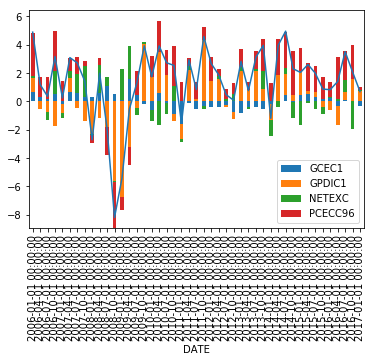

In [32]:
ax = df[['GCEC1', 'GPDIC1', 'NETEXC', 'PCECC96']].plot(kind='bar', stacked=True)
ax.plot(df['GDPC1'].values)
#Adjust the ticklabels
#ax.xaxis.set_major_formatter()
#ax.xaxis.set_ticklabels(xtick)

In [6]:
df.to_csv('C:/Working/Python/Macro_Dash/data/gdp_comp.csv')